## INTRODUCTION

Real Estste remain sto be on of the booming business ince the 19th Century. This has been attributed by various factors  among them being  vitality of shelter  for human beings survival. Prestige and wealth has also been measured by the kind of a house a person owns. This a side what is the main goal  of the real estate agent? Sales and profit. This study aims  provide insights  on what factors to consider when listing houses for  sale in order to reap maximum profits.

### BUSINESS UNDERSTANDING
Real estate agents are businessmen who sell properties. They help buyers find their dream homes, decide on the best location, and secure financing. Their primary goal is to make money by selling homes. Real estate agents often use various tools, such as price research, market research, and financial analysis, to help them make informed decisions. We are going King housing data  to provide insights on what factors to consider when listing housing for sale in order to reap maximum profit

## STUDY OBJECTIVES
1. **Outline Key predictors of House prices**:
Explore features that have a significant impact on house prices in King County

2. **Predict House prices**:
Fit Linear regression Model to predict house prices

3. **Evaluate how best the Model predicts House prices**

## DATA UNDERSTANDING

King  County Housing data contains sales price of properties  sold between y1 and y2 as well as various fetures for specific properties. The colums are well described below:
olumn Names and descriptions for Kings County Data Set
* **id** - unique identifier  for a house
* **dateDate** - This is the date whwn the house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** - This is the number  of Bedrooms in the House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors




# Imports

In [2]:
import pandas as pd
import csv as csv
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

## EDA and Data Cleaning

In [3]:
path= r"C:\Users\Ruth Kioko\Desktop\DSC_COURSE\PHASE2REPOS\CHECKPOINTS\Group-5-phase-2-project\Data\kc_house_data.csv"
Housing_df = pd.read_csv(path, index_col=0)

In [4]:
Housing_df.info()
Housing_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

King County dataset has:

* **21613 observations** : This is the number of observations in the dataset
* **21 columns** : This is the number of variables in the dataset.


## DATA PREPARATION

In [5]:
mode_value = Housing_df["waterfront"].mode()[0]
print(mode_value)
Housing_df["waterfront"] = Housing_df["waterfront"].fillna(mode_value)

0.0


In [6]:
Housing_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## FEATURE SELECTION

Using Correlation heatmap, we can identify what variables affecting the house prices to aiding in fitting a model that will help us predict the house prices.

<Figure size 3000x6000 with 0 Axes>

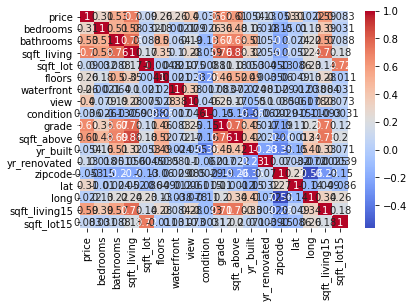

<Figure size 3000x6000 with 0 Axes>

In [7]:
import seaborn as sns
sns.heatmap(Housing_df.corr(),cmap="coolwarm",annot=True,)
plt.figure(figsize=(20, 40), dpi=150)

In [8]:
import numpy as np
Housing_df["bedrooms_log"]= np.log(Housing_df["bedrooms"])
Housing_df["bathrooms_log"]= np.log(Housing_df["bathrooms"])
Housing_df["sqft_living_log"]= np.log(Housing_df["sqft_living"])
Housing_df["sqft_above_log"]= np.log(Housing_df["sqft_above"])
Housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_log,bathrooms_log,sqft_living_log,sqft_above_log
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,98178,47.5112,-122.257,1340,5650,1.098612,0.000000,7.073270,7.073270
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1991.0,98125,47.7210,-122.319,1690,7639,1.098612,0.810930,7.851661,7.682482
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,NaN,98028,47.7379,-122.233,2720,8062,0.693147,0.000000,6.646391,6.646391
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0.0,98136,47.5208,-122.393,1360,5000,1.386294,1.098612,7.580700,6.956545
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,98074,47.6168,-122.045,1800,7503,1.098612,0.693147,7.426549,7.426549


In [9]:
correlation_matrix = Housing_df.corr()
correlation_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_log,bathrooms_log,sqft_living_log,sqft_above_log
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.395734,0.036056,0.667951,...,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.298844,0.456122,0.611839,0.542675
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078523,0.026496,0.356563,...,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.958967,0.507629,0.621820,0.516072
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186451,-0.126479,0.665838,...,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,0.524353,0.970557,0.762135,0.695839
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.282532,-0.059445,0.762779,...,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,0.579668,0.708156,0.954607,0.843133
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075298,-0.008830,0.114731,...,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.033051,0.075149,0.150102,0.163623
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028436,-0.264075,0.458794,...,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.190985,0.501036,0.367564,0.547619
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.382000,0.016648,0.082818,...,0.081397,0.028923,-0.012157,-0.037628,0.083823,0.030658,-0.008360,0.047165,0.078900,0.059125
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,0.249727,...,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332,0.070245,0.157791,0.245362,0.157283
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045735,1.000000,-0.146896,...,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.026953,-0.113356,-0.049620,-0.150730
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249727,-0.146896,1.000000,...,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981,0.380427,0.644204,0.743038,0.742869


In [10]:
X = Housing_df[["sqft_living_log","grade","bedrooms_log"]]
Y = Housing_df[["price"]]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

In [19]:
X1 = Housing_df[["sqft_living_log","grade","bathrooms_log"]]
Y = Housing_df[["price"]]

In [20]:
x1_train, x1_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [21]:
model1 = LinearRegression()
model1.fit(x1_train, y_train)
y_pred = model1.predict(x_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 171971.1435468919
R-squared: 0.4455427272124267
